# Supervised Machine Learning  Project on classification

In this notebook we are to implement the classification algorithms in the available dataset. We import a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [541]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline 


**About dataset**
This dataset is about past loans. The Loan_train.csv data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

Field	Description

**Loan_status**-	Whether a loan is paid off on in collection

**Principal**	-Basic principal loan amount at the

**Terms**	-Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule

**Effective_date**-	When the loan got originated and took effects

**Due_date**	-Since it’s one-time payoff schedule, each loan has one single due date

**Age**	-Age of applicant

**Education**	-Education of applicant

**Gender**	-The gender of applicant

Lets import the dataset

In [542]:
df = pd.read_csv("C:/Users/hp/Desktop/loan_train.csv")

In [543]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [544]:
df.shape

(346, 10)

#### Convert to date time object


In [545]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


#### Data visualization and pre-processing

Let’s see how many of each class is in our data set

In [546]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection.
Lets plot some columns to underestand data better

In [547]:
import seaborn as sns

In [548]:
binsP = np.linspace(df.Principal.min(), df.Principal.max(), 10)   #creating a sequence if equally spaced numbers within defined range 
binsP

array([ 300.    ,  377.7778,  455.5556,  533.3333,  611.1111,  688.8889,
        766.6667,  844.4444,  922.2222, 1000.    ])

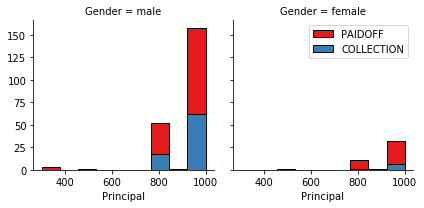

In [549]:
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=binsP, ec="k")
g.axes[-1].legend()
plt.show()

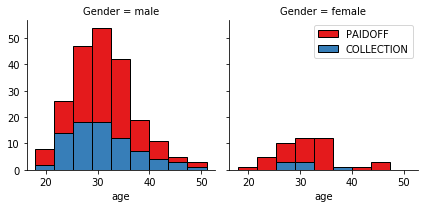

In [550]:
binsA = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=binsA, ec="k")

g.axes[-1].legend()
plt.show()

#### Pre-processing: Feature selection/extraction

Lets look at the day of the week people get the loan

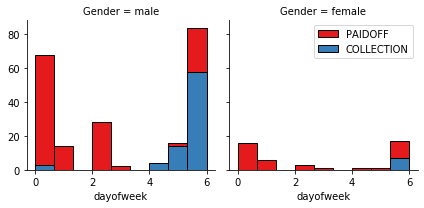

In [551]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
binsW = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=binsW, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less than day 4.

In [552]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


#### Convert Categorical features to numerical values

Firstly **Gender**

In [553]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan

converting male to 0 and female to 1:

In [554]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


For **education**

In [555]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### converting categorical varables to binary variables and append them to  Data Frame

In [556]:
X = df[['Principal','terms','age','Gender','weekend']]
X = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
X.drop(['Master or Above'], axis = 1,inplace=True)
X.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0,0,1,0
1,1000,30,33,1,0,1,0,0,1,0,0
2,1000,15,27,0,0,0,0,1,0,0,1
3,1000,30,28,1,1,0,0,1,0,0,1
4,1000,30,29,0,1,0,0,1,0,0,1


In [557]:
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0,0,1,0
1,1000,30,33,1,0,1,0,0,1,0,0
2,1000,15,27,0,0,0,0,1,0,0,1
3,1000,30,28,1,1,0,0,1,0,0,1
4,1000,30,29,0,1,0,0,1,0,0,1


In [558]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

#### Normalizing Data

Data Standardization give data zero mean and unit variance.

In [560]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.5158,  0.9207,  2.3315, -0.4206, -1.2058, -0.3817,  1.1364,
        -0.8697, -0.3817,  1.1364, -0.8697],
       [ 0.5158,  0.9207,  0.3417,  2.3778, -1.2058,  2.6199, -0.88  ,
        -0.8697,  2.6199, -0.88  , -0.8697],
       [ 0.5158, -0.9591, -0.6532, -0.4206, -1.2058, -0.3817, -0.88  ,
         1.1498, -0.3817, -0.88  ,  1.1498],
       [ 0.5158,  0.9207, -0.4874,  2.3778,  0.8293, -0.3817, -0.88  ,
         1.1498, -0.3817, -0.88  ,  1.1498],
       [ 0.5158,  0.9207, -0.3216, -0.4206,  0.8293, -0.3817, -0.88  ,
         1.1498, -0.3817, -0.88  ,  1.1498]])

### Classification

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:

1.K Nearest Neighbor(KNN)

2.Decision Tree

3.Support Vector Machine

4.Logistic Regression

### 1. K Nearest Neighbor(KNN)

We should find the best k to build the model with the best accuracy.

In [561]:
X[0:5]

array([[ 0.5158,  0.9207,  2.3315, -0.4206, -1.2058, -0.3817,  1.1364,
        -0.8697, -0.3817,  1.1364, -0.8697],
       [ 0.5158,  0.9207,  0.3417,  2.3778, -1.2058,  2.6199, -0.88  ,
        -0.8697,  2.6199, -0.88  , -0.8697],
       [ 0.5158, -0.9591, -0.6532, -0.4206, -1.2058, -0.3817, -0.88  ,
         1.1498, -0.3817, -0.88  ,  1.1498],
       [ 0.5158,  0.9207, -0.4874,  2.3778,  0.8293, -0.3817, -0.88  ,
         1.1498, -0.3817, -0.88  ,  1.1498],
       [ 0.5158,  0.9207, -0.3216, -0.4206,  0.8293, -0.3817, -0.88  ,
         1.1498, -0.3817, -0.88  ,  1.1498]])

#### Classifier implementing the k-nearest neighbors vote

In [562]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=4)
print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Train set: (276, 11) (276,)
Test set: (70, 11) (70,)


#### Training Model
 with k=4

In [563]:
model= KNeighborsClassifier(n_neighbors=4)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

#### Predictions

In [564]:
y_hat=model.predict(x_test)
y_hat[0:5]

array(['COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

#### Accuracy evaluation

1. In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [565]:
from sklearn import metrics
print('Train Accuracy:', metrics.accuracy_score(y_train, model.predict(x_train)))
print('Test Accuracy:', metrics.accuracy_score(y_test, y_hat))

Train Accuracy: 0.8115942028985508
Test Accuracy: 0.6714285714285714


2. **Jaccard Index**

In [566]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_hat)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6714285714285714

3. **F-1 Score**

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

In [567]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat, average='weighted')

0.697251258226868

Here, we see that out of sample accuracy is around 68% by three metrics.

### 2. Decision Tree

Adding one more variable,'education' in dataset.
But, decision tree model does not handle categorical data, hence we will convert these variables into nu,erical values.

In [569]:
# Covering 'gender' and 'education'
import random
df['education'] = random.choices(["High School or Below", "Bechalor", "college", "Master or Above"], k = 346)
df["education"] = df["education"].map({"High School or Below":2, "Bechalor":4, "college":6, "Master or Above":8})

df=df[['loan_status','Principal','terms','age','education','Gender']]

df.head()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,loan_status,Principal,terms,age,education,Gender
0,PAIDOFF,1000,30,45,2,0
1,PAIDOFF,1000,30,33,2,1
2,PAIDOFF,1000,15,27,4,0
3,PAIDOFF,1000,30,28,4,1
4,PAIDOFF,1000,30,29,2,0


In [570]:
XD = df[['Principal', 'terms', 'age', 'education', 'Gender']].values
XD[0:5]

array([[1000,   30,   45,    2,    0],
       [1000,   30,   33,    2,    1],
       [1000,   15,   27,    4,    0],
       [1000,   30,   28,    4,    1],
       [1000,   30,   29,    2,    0]], dtype=int64)

In [571]:
yd= df['loan_status']
yd[0:5]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

#### Training Model

In [572]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test,y_train,  y_test = train_test_split(XD, yd, test_size=0.2, random_state=3)
tree=DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Predictions

In [573]:
T_predict= tree.predict(x_test)
print(T_predict[0:10])
print(y_test[0:10])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
73        PAIDOFF
24        PAIDOFF
282    COLLECTION
295    COLLECTION
163       PAIDOFF
298    COLLECTION
15        PAIDOFF
313    COLLECTION
205       PAIDOFF
101       PAIDOFF
Name: loan_status, dtype: object


Here,we notice that out of 6 randam observations, 4 values are predicted incorrectly i.e., **60%** accuracy.
Further, we will check the accuracy for complete model.

In [574]:
from sklearn.metrics import jaccard_similarity_score, f1_score


**1. Acuracy Classification Score**

In [575]:
print('Train Accuracy:', metrics.accuracy_score( y_train, tree.predict(x_train)))
print('Test Accuracy:', metrics.accuracy_score( y_test, tree.predict(x_test)))

Train Accuracy: 0.7753623188405797
Test Accuracy: 0.6714285714285714


**2. Jaccard Index**

In [576]:
print('Train Accuracy:', jaccard_similarity_score( y_train, tree.predict(x_train)))
print('Test Accuracy:', jaccard_similarity_score( y_test, tree.predict(x_test)))

Train Accuracy: 0.7753623188405797
Test Accuracy: 0.6714285714285714


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


**3. f1_score**

In [577]:
print('Train Accuracy:', f1_score( y_train, tree.predict(x_train), average='weighted'))
print('Test Accuracy:', f1_score( y_test, tree.predict(x_test), average='weighted'))

Train Accuracy: 0.6808234586600144
Test Accuracy: 0.5394383394383394


Here, we notice that f1_score has considerable difference as compared with score given other two metrics.

### 3. Support Vector Machine

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

In [578]:
import pylab as pl
import scipy.optimize as opt

In [579]:
df.head()

,loan_status,Principal,terms,age,education,Gender
0,PAIDOFF,1000,30,45,2,0
1,PAIDOFF,1000,30,33,2,1
2,PAIDOFF,1000,15,27,4,0
3,PAIDOFF,1000,30,28,4,1
4,PAIDOFF,1000,30,29,2,0


All variables are numerical except loan_status. We will convert it into numerical form.

In [580]:
loan_status= random.choices(['PAIDOFF','COLLECTION'], k=346)
df['loan_status']= df['loan_status'].map({'PAIDOFF':5, 'COLLECTION': 10})    # assigning PAIDOFF = 5, COLLECTION= 10
df.head()

,loan_status,Principal,terms,age,education,Gender
0,5,1000,30,45,2,0
1,5,1000,30,33,2,1
2,5,1000,15,27,4,0
3,5,1000,30,28,4,1
4,5,1000,30,29,2,0


#### Visualizing AGE vs Gender

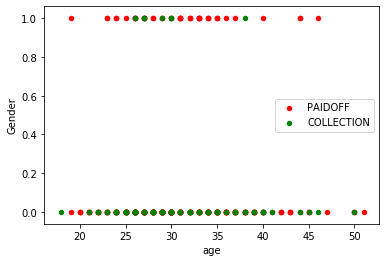

In [586]:
ax = df[df['loan_status'] == 5][0:350].plot(kind='scatter', x='age', y='Gender', color='Red', label='PAIDOFF');
df[df['loan_status'] == 10][0:350].plot(kind='scatter', x='age', y='Gender', color='Green', label='COLLECTION', ax=ax);
plt.show()

#### Data pre-processing and selection


In [587]:
# Data types
df.dtypes

loan_status    int32
Principal      int64
terms          int64
age            int64
education      int64
Gender         int64
dtype: object

In [588]:
X_svm = df.drop(['loan_status'], axis=1)

In [589]:
X_svm[0:5]

,Principal,terms,age,education,Gender
0,1000,30,45,2,0
1,1000,30,33,2,1
2,1000,15,27,4,0
3,1000,30,28,4,1
4,1000,30,29,2,0


We want the model to predict the value of loan_status (that is, PAIDOFF (=5) or COLLECTION (=10)). As this field can have one of only two possible values, we need to change its measurement level to reflect this.

In [590]:
df['loan_status'] = df['loan_status'].astype('int')
y_svm = df['loan_status']
y_svm[0:5]

0    5
1    5
2    5
3    5
4    5
Name: loan_status, dtype: int32

#### Train/Test dataset

In [591]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size= 0.2, random_state= 4)
print('Train data:', x_train.shape, y_train.shape)
print('Test data:', x_test.shape, y_test.shape)

Train data: (276, 5) (276,)
Test data: (70, 5) (70,)


#### Trainnig the model

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear

2.Polynomial

3.Radial basis function (RBF)

4.Sigmoid


Let's just use the default, RBF (Radial Basis Function) for this model.

In [592]:
from sklearn import svm
SVM= svm.SVC(kernel='rbf')

In [593]:
SVM.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Predictions

In [594]:
pred= SVM.predict(x_test)
pred[0:5]

array([5, 5, 5, 5, 5])

Recall that we have labelled PAIDOFF as '5' and COLLECTION as '10'.

Further, we will **EVALUATE** the efficiency of the model by following metrics:

1. confusion_matrix

2. Jaccard Index

3. f1_score

#### 1. confusion_matrix

In [595]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [596]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    
    print('Confudion Matrix without normalization')    
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks,  classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt= '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
        
        plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
        
    

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           5       0.79      1.00      0.88        55
          10       0.00      0.00      0.00        15

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

Confudion Matrix without normalization
[[55  0]
 [15  0]]


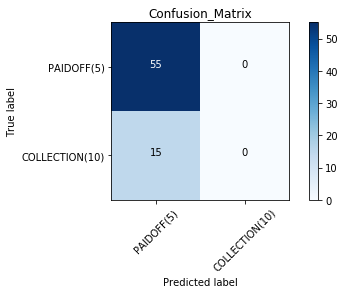

In [597]:
# Compute confusion matrix
confus_matrix= confusion_matrix(y_test, pred, labels=[5,10])
np.set_printoptions(precision=4)

print(classification_report(y_test, pred))
plt.figure()
plot_confusion_matrix(confus_matrix, classes=['PAIDOFF(5)', 'COLLECTION(10)'], normalize= False, title= 'Confusion_Matrix')

#### 2 Jaccard Index.

In [598]:
print('Train Accuracy:', jaccard_similarity_score(y_train, SVM.predict(x_train)))
print('Test Accuracy:', jaccard_similarity_score(y_test, SVM.predict(x_test)))

Train Accuracy: 0.7427536231884058
Test Accuracy: 0.7857142857142857


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


#### 3. f1_score

In [599]:
print('Train Accuracy:', f1_score(y_train, SVM.predict(x_train), average='weighted'))
print('Test Accuracy:', f1_score(y_test, SVM.predict(x_test), average='weighted'))

Train Accuracy: 0.6331163939859591
Test Accuracy: 0.6914285714285714


Here, we see that test accuracy is higher than train accuracy.

### 4. Logistic Regression

In [600]:
import scipy.optimize as opt


In [601]:
df.head()


,loan_status,Principal,terms,age,education,Gender
0,5,1000,30,45,2,0
1,5,1000,30,33,2,1
2,5,1000,15,27,4,0
3,5,1000,30,28,4,1
4,5,1000,30,29,2,0


In [602]:
X_logr= df.drop('loan_status', axis=1)
X_logr.head()

,Principal,terms,age,education,Gender
0,1000,30,45,2,0
1,1000,30,33,2,1
2,1000,15,27,4,0
3,1000,30,28,4,1
4,1000,30,29,2,0


In [603]:
y_logr= df['loan_status']
y_logr[0:5]

0    5
1    5
2    5
3    5
4    5
Name: loan_status, dtype: int32

Normalizing the datast

In [604]:
X_logr= preprocessing.StandardScaler().fit(X_logr).transform(X_logr)
X_logr[0:5]

array([[ 0.5158,  0.9207,  2.3315, -1.2977, -0.4206],
       [ 0.5158,  0.9207,  0.3417, -1.2977,  2.3778],
       [ 0.5158, -0.9591, -0.6532, -0.3738, -0.4206],
       [ 0.5158,  0.9207, -0.4874, -0.3738,  2.3778],
       [ 0.5158,  0.9207, -0.3216, -1.2977, -0.4206]])

#### Train and Test split

In [605]:
x_train, x_test, y_train, y_test = train_test_split(X_logr, y_logr, test_size= 0.2, random_state=4)
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (276, 5) (276,)
test set: (70, 5) (70,)


#### Modeling Logistic Regression

Lets build our model using **LogisticRegression** from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. Every optimizer has its own importance.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. **C** parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now lets fit our model with train set:

In [606]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)


#### Predictions

In [607]:
y_train_hat= LR.predict(x_train)
y_train_hat[0:5]

array([5, 5, 5, 5, 5])

Here, we can also use **predict_proba** which estimates the probabilities of class 1, i.e., P(Y=1|X) as well as  probabilities of class 2 i.e., 1-P(Y=1|X)= P(Y=0|X)

In [608]:
y_train_hat_prob= LR.predict_proba(x_train) 
y_test_hat_prob= LR.predict_proba(x_test)


In [609]:
y_test_hat[0:10]

array([[0.5416, 0.4584],
       [0.6094, 0.3906],
       [0.5769, 0.4231],
       [0.5441, 0.4559],
       [0.5515, 0.4485],
       [0.5671, 0.4329],
       [0.5564, 0.4436],
       [0.5662, 0.4338],
       [0.5613, 0.4387],
       [0.6009, 0.3991]])

#### Evaluation
 1.  Jaccard Index
 2.  f1_score
 3.  Log Loss

#### 1.Jaccard Index

In [610]:
print('Train Accuracy:', jaccard_similarity_score(y_train, y_train_hat))
print('Test Accuracy:', jaccard_similarity_score(y_test, LR.predict(x_test)))

Train Accuracy: 0.7427536231884058
Test Accuracy: 0.7857142857142857


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


#### 2.f1_score

In [611]:
print('Train Accuracy:', f1_score(y_train, y_train_hat, average='weighted'))
print('Test Accuracy:', f1_score(y_test, LR.predict(x_test), average='weighted'))

Train Accuracy: 0.6331163939859591
Test Accuracy: 0.6914285714285714


#### 3. Log Loss
In logistic regression, the output can be the probability. This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.The goal of our machine learning models is to minimize this value.

In [612]:
from sklearn.metrics import log_loss
print('Train Accuracy:', log_loss(y_train, y_train_hat_prob))
print('Test Accuracy:', log_loss(y_test, y_test_hat_prob))

Train Accuracy: 0.606487950567745
Test Accuracy: 0.6017507834541456


### Thus, we have final report based on Classification Models

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.68    | 0.68     | NA      |
| Decision Tree      | 0.67    | 0.53     | NA      |
| SVM                | 0.78    | 0.69     | NA      |
| LogisticRegression | 0.78    | 0.69     | 0.60    |

### Conclusion:

From the above report, we interpret that SVM and Logistic Regression models fit with higher accuracy and hence we should select any one model out of these two. 
Further, we also see that the probability of log_loss is higher than 0.5. Hence we are most likely to choose the **SVM model** for best efficiency.





Author: **Arun Virha**